# Coursework: Descriptive Statistics
 
## Prevalence of mental health disorders worldwide

After your successful experience in the Uruguayan government, you received an offer to work at the WHO in an area in charge of analyzing mental health metrics. Now you have the challenge of finding which demographic variables are related to a higher prevalence of mental health disorders in different countries.

Let's first load the data that has been provided to you for this task. These come from the [Data World](https://data.world/vizzup/mental-health-depression-disorder-data) portal.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_age = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-age.csv"
)
df_subsdis = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv"
)

## Depression according to age

In the DataFrame `df_age` you will find data on the prevalence of depression by age group in different countries. Take a first look at the table:

In [3]:
df_age.head()

entity code  year  20_24_years_old  10_14_years_old  \
0           Afghanistan  AFG  2017         4.386172         1.618270   
1               Albania  ALB  2017         2.437424         0.900396   
2               Algeria  DZA  2017         3.854475         1.757578   
3        American Samoa  ASM  2017         2.885708         1.063623   
4  Andean Latin America  NaN  2017         2.884113         1.024932   

   all_ages  70_years_old  30_34_years_old  15_19_years_old  25_29_years_old  \
0  3.050785      5.279772         5.749905         3.433750         5.105028   
1  2.607896      4.399558         2.401418         2.004014         2.398396   
2  3.691020      4.848270         4.630534         3.404122         4.256386   
3  2.787788      5.746022         2.971754         2.438167         2.862544   
4  2.538325      4.663443         2.966047         2.354958         2.933790   

   50_69_years_old  age_standardized  15_49_years_old  
0         6.131183          4.136347         5.010372  
1         3.664052          2.208414         2.487747  
2         5.402483          3.661094         4.522808  
3         5.451378          2.939668         3.115501  
4         4.408046          2.610385         2.969004

### Summary statistics

- Prepare a report that includes measures of central tendency and dispersion of depression prevalence data in each of the age groups present in the table. Also consider metrics about the shape of the distribution (skewness and kurtosis).

In [4]:
# Write your solution here
age_groups = df_age.drop(
    columns=["entity", "code", "year", "all_ages", "age_standardized"]
)
report = age_groups.describe()

skew = age_groups.skew()
kurt = age_groups.kurtosis()

skew.name = "skew"
kurt.name = "kurtosis"

pd.concat([report, skew.to_frame().T, kurt.to_frame().T])

20_24_years_old  10_14_years_old  70_years_old  30_34_years_old  \
count          231.000000       231.000000    231.000000       231.000000   
mean             3.706926         1.397120      6.046412         3.994721   
std              1.052299         0.417481      1.487770         0.996078   
min              1.780428         0.747197      3.324191         2.268459   
25%              3.042508         1.072127      4.805046         3.240232   
50%              3.423213         1.273278      5.800674         3.867810   
75%              4.185398         1.615594      7.358498         4.579750   
max             10.381345         3.164350     11.299540         8.790512   
skew             1.829072         1.115200      0.577767         0.939213   
kurtosis         6.841010         1.288080     -0.146975         1.734563   

          15_19_years_old  25_29_years_old  50_69_years_old  15_49_years_old  
count          231.000000       231.000000       231.000000       231.000000  
mean             3.056514         3.829041         5.577609         3.987390  
std              0.865632         0.993749         0.975802         0.940574  
min              1.558497         1.986453         3.297842         2.330373  
25%              2.482908         3.142142         4.796985         3.302787  
50%              2.839126         3.663979         5.504972         3.842542  
75%              3.415515         4.379901         6.306789         4.564212  
max              8.550650         9.441284         9.300100         8.961353  
skew             1.994705         1.284770         0.369266         1.209263  
kurtosis         7.752464         3.742199         0.339625         3.015201

- Which age group(s) have the highest prevalence of depression? And with lower prevalence? Make a graph to illustrate your results (hint: use the violinplot function from the seaborn package).

Text(0, 0.5, 'Depression prevalence (%)')

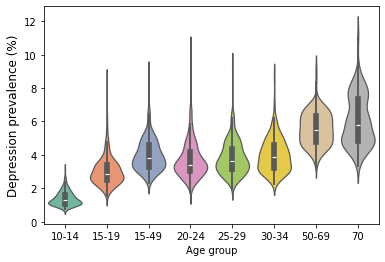

In [11]:
# Write your solution here
new_age_groups = age_groups.rename(
    columns={
        "20_24_years_old": "20-24",
        "10_14_years_old": "10-14",
        "70_years_old": "70",
        "30_34_years_old": "30-34",
        "15_19_years_old": "15-19",
        "25_29_years_old": "25-29",
        "50_69_years_old": "50-69",
        "15_49_years_old": "15-49",
    }
)
new_age_groups = new_age_groups.loc[
    :, ["10-14", "15-19", "15-49", "20-24", "25-29", "30-34", "50-69", "70"]
]
new_age_groups.rename_axis("Age group", axis="columns", inplace=True)
ax = sns.violinplot(data=new_age_groups, palette="Set2")
ax.set_ylabel("Depression prevalence (%)", size=12)

## Prevalence of mental health disorders worldwide

In the DataFrame `df_subsdis` you will find data on the prevalence of mental health disorders from different countries. Take a first look at the table:

In [3]:
df_subsdis.head()

entity code  year  schizophrenia  bipolar_disorder  \
0           Afghanistan  AFG  2017       0.166158          0.708089   
1               Albania  ALB  2017       0.201025          0.704480   
2               Algeria  DZA  2017       0.197913          0.818687   
3        American Samoa  ASM  2017       0.248557          0.468305   
4  Andean Latin America  NaN  2017       0.201471          0.881737   

   eating_disorders  anxiety_disorders  drug_use_disorders  depression  \
0          0.107142           4.882481            2.473934    4.136347   
1          0.174046           3.385245            0.517614    2.208414   
2          0.213612           5.065876            1.717218    3.661094   
3          0.177808           3.315834            0.772801    2.939668   
4          0.355475           4.267738            0.661481    2.610385   

   alcohol_use_disorders  
0               0.661217  
1               1.837955  
2               0.665191  
3               1.142277  
4               1.533573

### Summary statistics

- Prepare a report that includes measures of central tendency and dispersion based on quantiles (median and interquartile range) of the prevalence data of each of the mental health conditions present in the table (schizophrenia, bipolar disorder, eating disorders, mood disorders). anxiety, drug use disorder).  

In [12]:
# Write your solution here
disorders = df_subsdis.drop(columns=["entity", "code", "year"])

median = disorders.median()
median.name = "median"

iqr = disorders.quantile(0.75) - disorders.quantile(0.25)
iqr.name = "iqr"

report = pd.DataFrame([median, iqr])
report

schizophrenia  bipolar_disorder  eating_disorders  anxiety_disorders  \
median       0.203248          0.696349          0.204891           3.583301   
iqr          0.057523          0.220802          0.179425           1.477418   

        drug_use_disorders  depression  alcohol_use_disorders  
median            0.740219    3.463055               1.480769  
iqr               0.388046    0.880296               0.846882

- Which disorder(s) are most prevalent? And with lower prevalence? Make a graph to illustrate your results (tip: use the boxplot function from the seaborn package).

<ipython-input-15-d5650478bc66>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(disorders_labels)


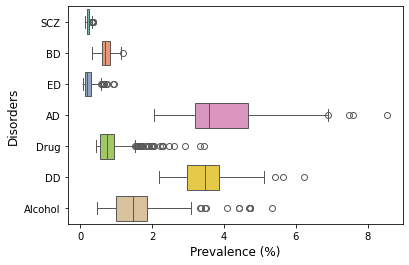

In [15]:
# Write your solution here

ax = sns.boxplot(data=disorders, orient="h", palette="Set2")
ax.set_xlabel("Prevalence (%)", size=12)
ax.set_ylabel("Disorders", size=12)
disorders_labels = ["SCZ", "BD", "ED", "AD", "Drug", "DD", "Alcohol"]
ax.set_yticklabels(disorders_labels)
plt.show()

### Correlation analysis

- Now, explore whether there are correlations between the prevalences of some of the mental health conditions listed. First calculate Spearman correlation coefficients and then create a heat map that makes it easy to interpret.

In [16]:
# Write your solution here

new_disorders = disorders.rename(
    columns={
        "schizophrenia": "SCZ",
        "bipolar_disorder": "BD",
        "eating_disorders": "ED",
        "anxiety_disorders": "AD",
        "drug_use_disorders": "Drug",
        "depression": "DD",
        "alcohol_use_disorders": "Alcohol",
    }
)
new_disorders.corr(method="spearman")

SCZ        BD        ED        AD      Drug        DD   Alcohol
SCZ      1.000000  0.161811  0.601344  0.367426  0.525947 -0.082523 -0.014941
BD       0.161811  1.000000  0.754950  0.579532  0.420843  0.080584  0.184800
ED       0.601344  0.754950  1.000000  0.608869  0.612022  0.076957  0.233868
AD       0.367426  0.579532  0.608869  1.000000  0.630539  0.346053 -0.056924
Drug     0.525947  0.420843  0.612022  0.630539  1.000000  0.228203 -0.083407
DD      -0.082523  0.080584  0.076957  0.346053  0.228203  1.000000 -0.149603
Alcohol -0.014941  0.184800  0.233868 -0.056924 -0.083407 -0.149603  1.000000

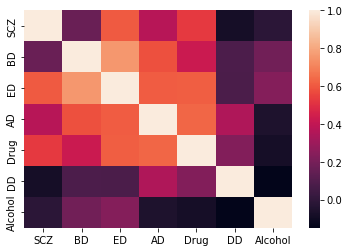

In [17]:
heatmap = sns.heatmap(new_disorders.corr(method="spearman"))
plt.show()

- Create a matrix of scatter plots of the variables.
(Hint: Use the pairplot function from the seaborn package.)

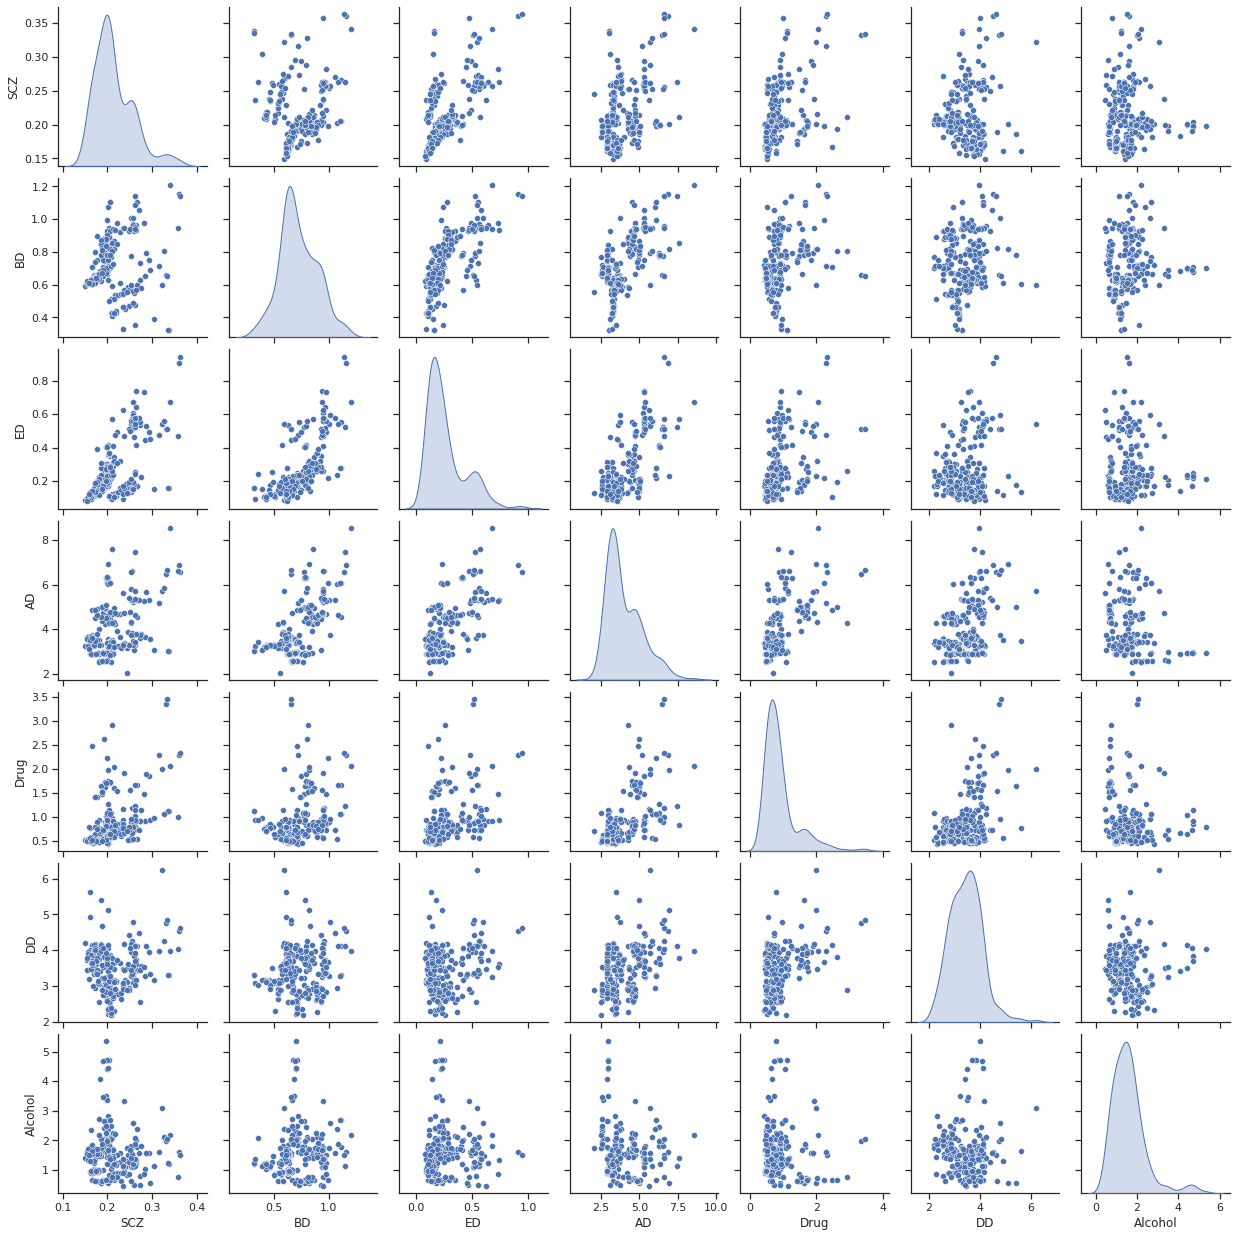

In [18]:
# Write your solution here
sns.set_theme(style="ticks")
sns.pairplot(new_disorders, diag_kind="kde")
plt.show()